In [6]:
%pip install ..

import jax.numpy as jnp
import matplotlib.pyplot as plt

from reflax.data_analysis.superlets import adaptive_superlet_transform

# use CPU
import jax
jax.config.update('jax_platform_name', 'cpu')

/export/home/lstorcks/miniforge3/envs/reflax/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Processing /export/home/lstorcks/thin-films
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for reflax: filename=reflax-0.0.3-py3-none-any.whl size=23022 sha256=f73dc0cb254cf45743e82e9c56aaa33cd0e5f28cf6d0af1f9a633d38c4730677
  Stored in directory: /export/home/lstorcks/.cache/pip/wheels/4c/b6/ca/f050eeb2409e8024dea6e095a5be45d60e949412f644ff617e
Successfully built reflax
  Attempting uninstall: reflax
    Found existing installation: reflax 0.0.3
    Uninstalling reflax-0.0.3:
      Successfully uninstalled reflax-0.0.3
Note: you may need to restart the kernel to use updated packages.


In [7]:
t_max = 1
sampling_freq = 1000
t = jnp.linspace(0, t_max, int(t_max * sampling_freq))

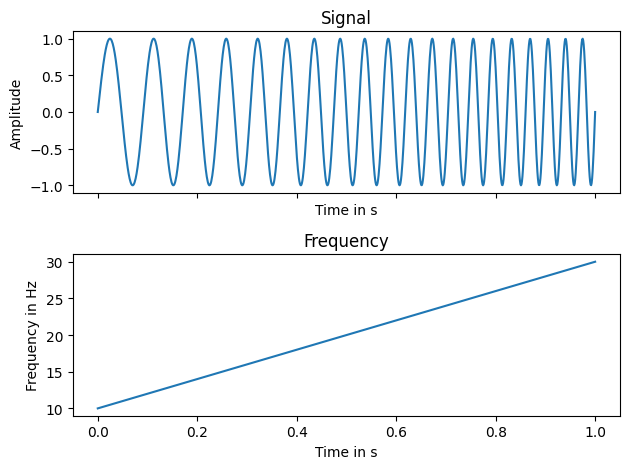

In [8]:
# create a signal with linearly increasing frequency
a = 10
b = 10
f = b + a * t

freal = 2 * a * t + b

signal = jnp.sin(2 * jnp.pi * f * t)

# plot the signal
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, signal)
ax1.set_title("Signal")
ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Time in s")

# plot frequency over time
ax2.plot(t, freal)
ax2.set_title("Frequency")
ax2.set_ylabel("Frequency in Hz")
ax2.set_xlabel("Time in s")

plt.tight_layout()

In [9]:
freqs = jnp.linspace(5, 35, 100)

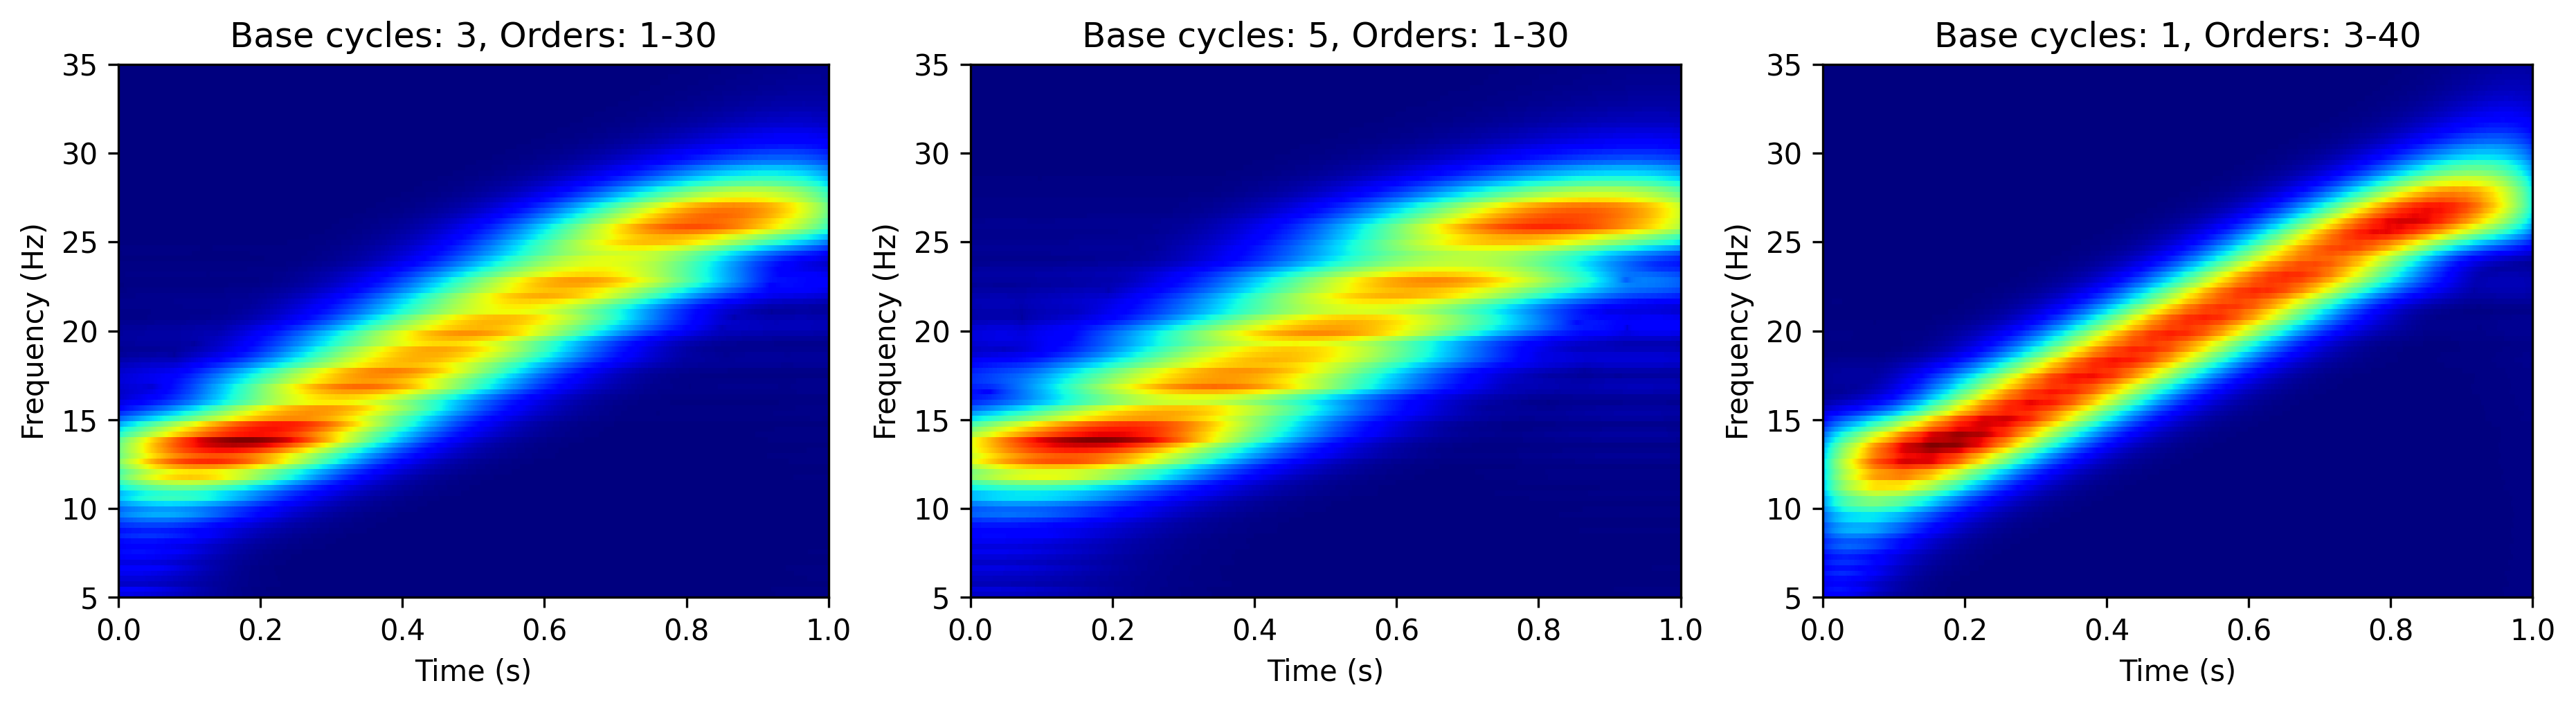

In [13]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5), dpi=300)

for (i, (base_cycle, min_order, max_order)) in enumerate(zip([3, 5, 1], [1, 1, 3], [30, 30, 40])):
    scalogram = adaptive_superlet_transform(signal, freqs, sampling_freq=sampling_freq, 
                                        base_cycle=base_cycle, min_order=min_order, max_order=max_order)

    # scalogram = superlets(signal, sampling_freq, freqs, base_cycle, [min_order, max_order])

    ax[i].imshow(jnp.abs(scalogram)**2, aspect=1/40, cmap="jet", interpolation="none", origin="lower", extent=[0, len(signal)/sampling_freq, freqs[0], freqs[-1]])
    ax[i].set_title(f"Base cycles: {base_cycle}, Orders: {min_order}-{max_order}")
    ax[i].set_xlabel("Time (s)")
    ax[i].set_ylabel("Frequency (Hz)")